### Hey guys, welcome to my notebook! I'm Charles - Major in Data Science & Artificial Intelligence at HUST.

### This is a part of the series "Machine Learning Tools" by me. I hope you are interested in it !

>**Reach me on:**
>* `Github`: github.com/tuanlda78202
>* `LinkedIn`: linkedin.com/in/tuanlda78202
>* `Facebook`: fb.com/tuanlda78202

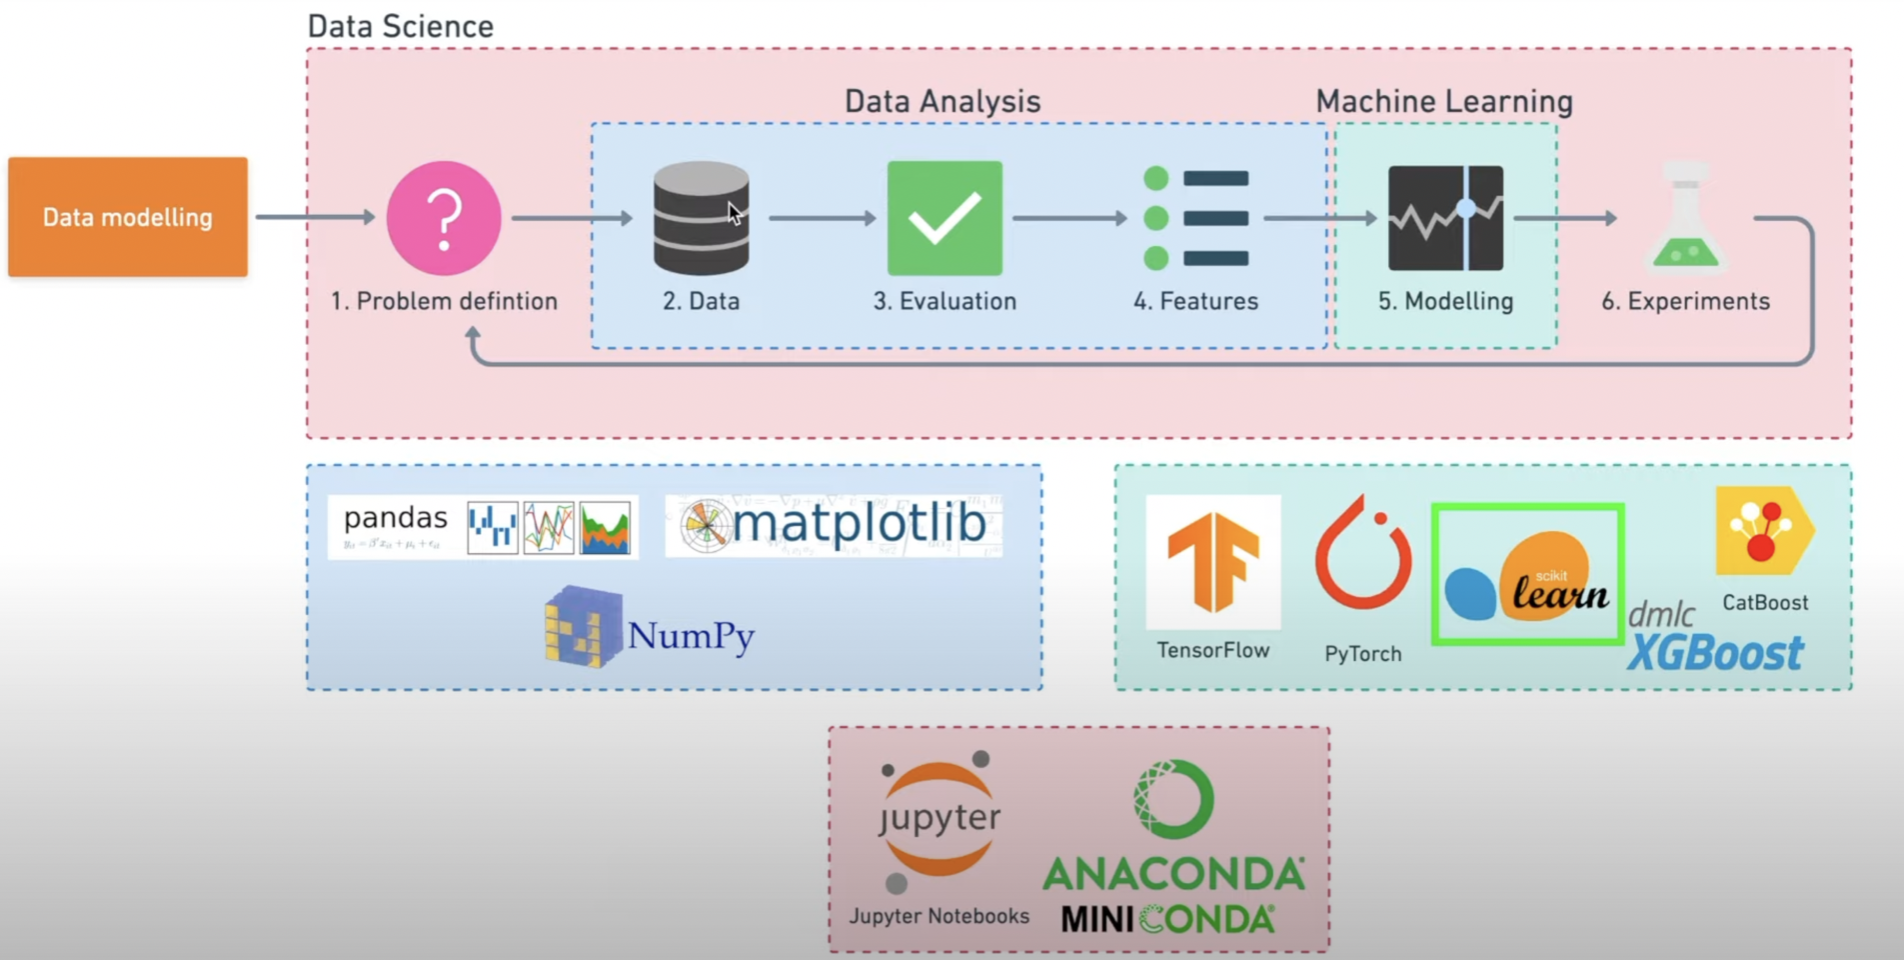


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. `Importing Dataset` 🥒

In [23]:
data_df = pd.read_csv("https://raw.githubusercontent.com/CodexploreRepo/data_science/main/Code/P01_Pre_Processing/Data.csv")

data_df

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

# 2. `Data Impultation` (Missing Data Replacement) 🥬

>Datasets often have missing values and this can cause probs for ML algorithms. It's considered good practise to identify and replace missing values in each cols of your datasets prior to performing predictive modelling. This method of missing data replacement is referred to as data impultation

>Data imputation is the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits.

## 2.1. Scaning Data

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [2]:
# pd.isna(obj): detect missing values for an array-like object & return T=1/F=0, so we can sum !
data_df.isna()

NameError: name 'data_df' is not defined

In [26]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data / len(data_df) * 100
    print('Column {}: has {}% missing data'.format(col,missing_percent))

Column Country: has 0.0% missing data
Column Age: has 10.0% missing data
Column Salary: has 10.0% missing data
Column Purchased: has 0.0% missing data


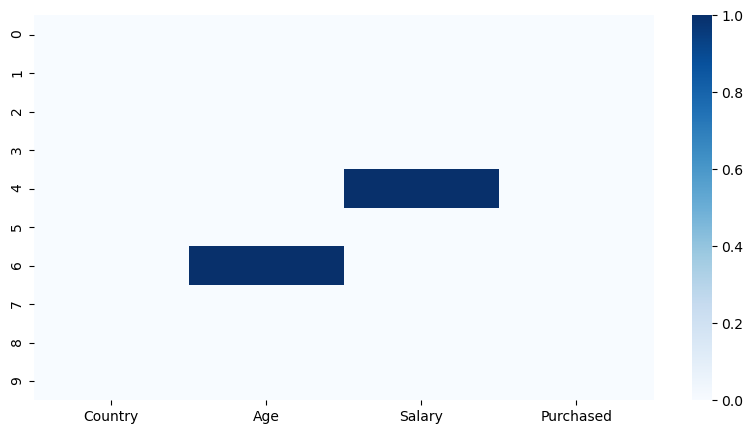

In [27]:
# if datasets >>, we should use heatmap to visualizing

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_df.isna(), cmap = "Blues")

plt.show()

In [28]:
X = data_df.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [29]:
y = data_df.iloc[:,-1].values
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## 2.2. Handle Missing Data



In [30]:
from sklearn.impute import SimpleImputer

# creating an instance of CLASS SIMPLEIMPUTER: np.nan is the empty value in the dataset.
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# fitting the imputer & imputing all missing values
X[:,[1,2]] = imputer.fit_transform(X[:,[1,2]])

X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# 3. `Encode Categorical Data` 🏵

## 3.1. Encode Independent var (X)

* Since for the independent variable, we will convert into vector of 0 & 1

* `ColumnTransformer` & `OneHotEncoder`:  encoding technique for features are nominal

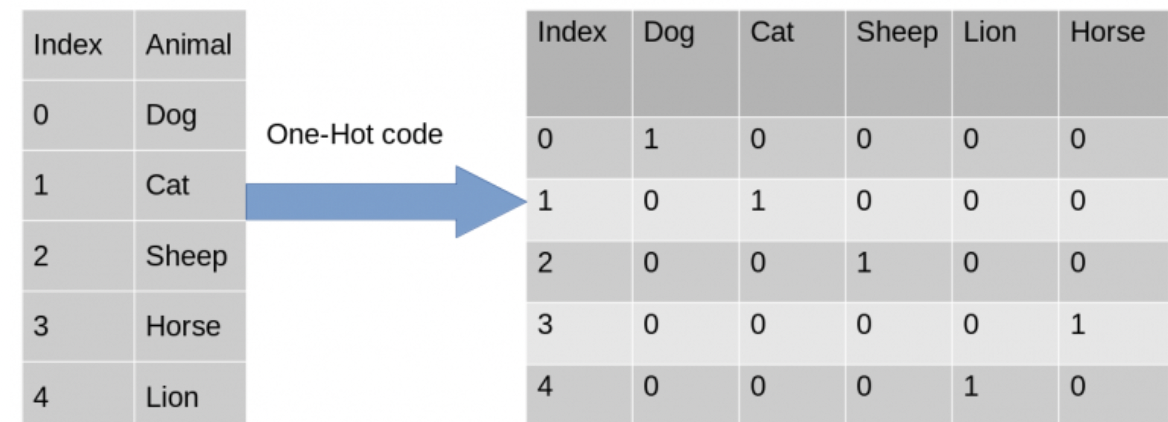

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

* `transformers`: specify what kind of transformation, and which cols

* `('encoder' encoding transformation, instance of Class OneHotEncoder, [cols to transform])`

* `remainder ="passthrough"` to keep the cols which not be transformed. Otherwise, the remaining cols will not be included


In [32]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder="passthrough")
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## 3.2. Encode Dependent var (y)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# 4. `Spilit the dataset` 🍎

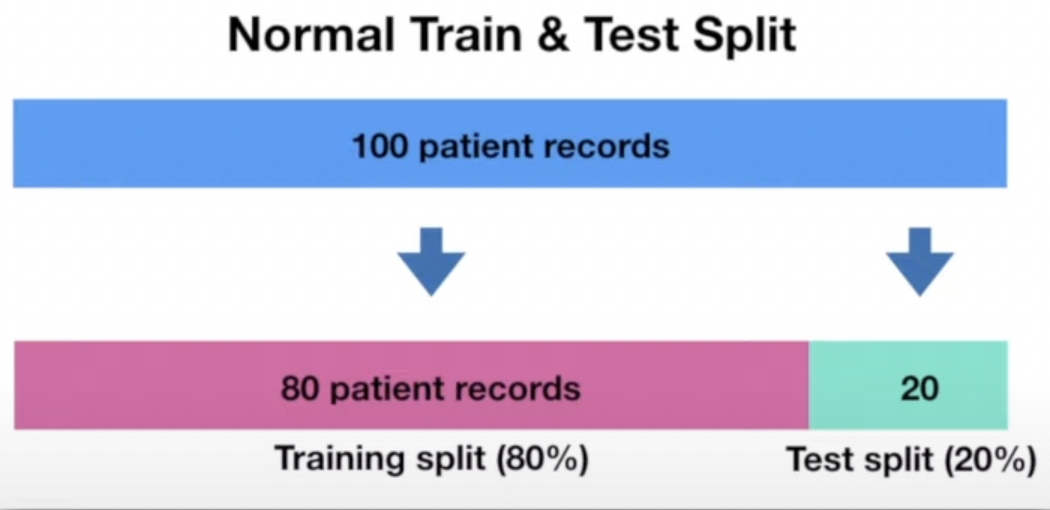


In [34]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
# because train_test_split random dataset 8:2, so fixed it.
X_train, X_test, y_train, y_tets = train_test_split(X,y,test_size = 0.2)

# 5. `Feature Scalling` 🍇

>Scaling all the features in the same scale to prevent 1 feature dominates the others & then neglected by ML Model.

   **FS MUST be done AFTER splitting** Training & Test sets.

> FS is technique to get the mean & median of features in order to scale. If we apply FS before splitting Training & Test sets, it will include the mean & median of both Training Set and Test Set > **Information Leakage** 

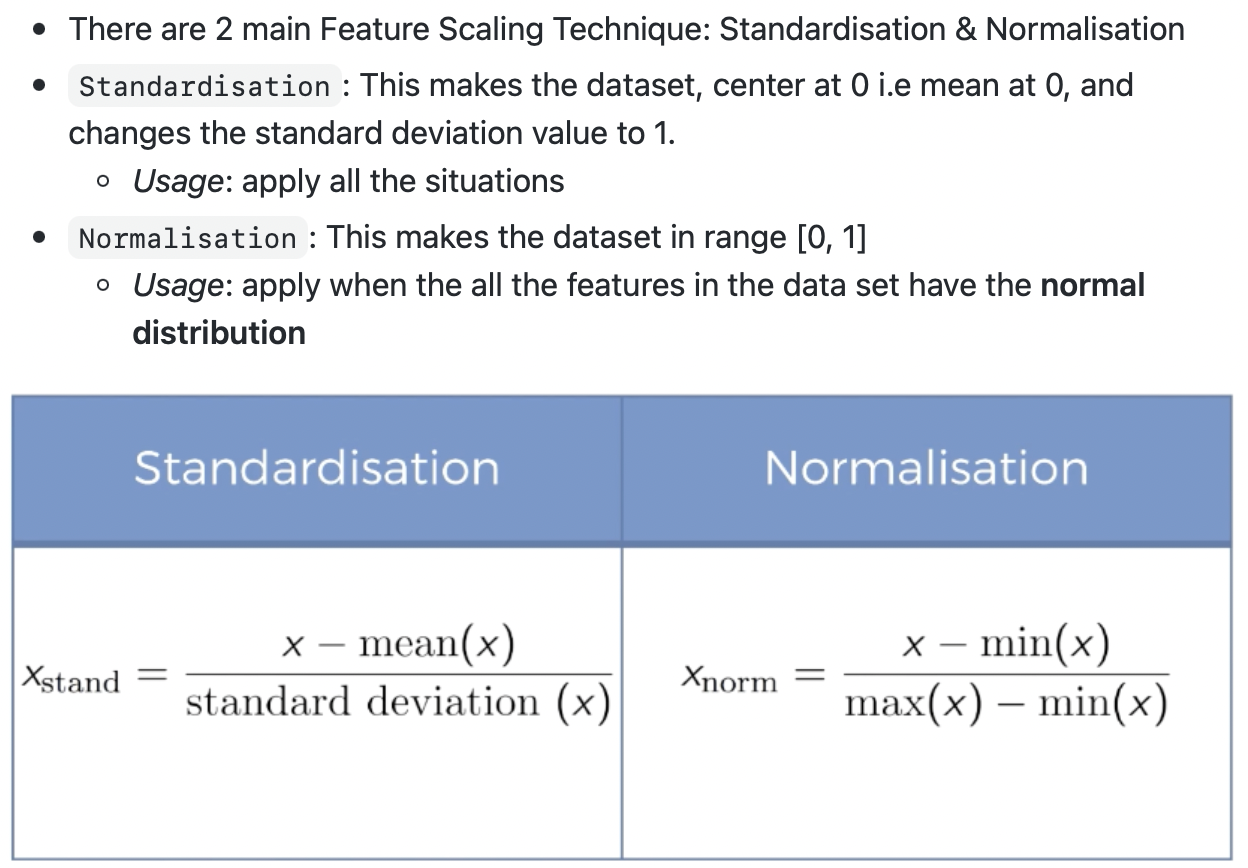



In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [36]:
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

X_test

array([[0.0, 1.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, -1.0, -1.0]], dtype=object)